<a href="https://colab.research.google.com/github/DevNicque/ExtraTreesClassifierModel-ML/blob/master/IrisPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> <p align="justify">

**Autor(a):** Andrea Monicque dos Santos Silva

**Email:** *amonicquesantos@gmail.com*

**Github:** *https://github.com/DevNicque*

**Linkedin:** *https://www.linkedin.com/in/andreamonicque-0476/* 
</p>

---



# **Projeto ML - Predição de Iris**

---



<p align="justify">

*   Neste projeto foi utilizado o Modelo Extra Trees Classifier 
*   Um modelo altamente poderoso que combina as predições de várias árvores de decisão gerando um melhor resultado
*   Com o objetivo de predizer espécies de Iris (flor) à partir do dataset Iris
*   O dataset contém informações sobre características de 3 tipos de flores: Iris Setosa, Iris Versicolor e Iris Virginica
*   Documentação Modelo: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
*   Dataset: http://archive.ics.uci.edu/ml/datasets/Iris

</p>


## **Visão Geral**


> <p align="justify"> 
Diante da diversidade de flora com inúmeras espécies de plantas, utiliza-se do conhecimento de características específicas para a identificação das mesmas. Um trabalho difícil, visto que não se tem todas as informações centralizadas em uma fonte de forma acessível que possibilite consultas a partir dessas características, como um app, site, geralmente sendo feito de formas mais trabalhosas. A proposta é criar um classificador que consiga predizer e identificar plantas à partir de suas características, viabilizando uma possível forma acessível e assertiva para o usuário final. 
 </p>



## **Objetivo**

> <p align="justify"> O objetivo consiste em treinar modelo de machine learning para classificação de especies de iris, com o intuito de realizar predições dessas espécies. 
</p>

## **Metodologia Geral**

> <p align="justify"> 

1. Aquisição dos Dados
2. Compreensão dos dados
3. Processamento dos Dados
4. Modelado
5. Avaliação
</p>

## **Estrutura do Notebook**

> <p align="justify"> 

1. Aquisição
2. Pré-processamento
3. Modelo ML
4. Avaliação
5. Conclusão
</p>

#**Aquisição**

**Importando bibliotecas necessárias**

<p align="justify">

*  Sklearn, uma biblioteca de aprendizagem de máquina para python, é utilizada neste projeto para exportação de algoritmos e funções como Extra Tress Classifier, algoritmo escolhido como modelo de predição, Train test split, função utilizada para divisão e criação dos conjuntos de teste e treino, accuracy_score, confusion_matrix, classification_report, f1_score,recall_score , métricas utilizadas para avaliar o resultado do modelo. 

*  Também se faz uso das bibliotecas pandas, numpy, searborn utilizadas respectivamente para análise e manipulação de dados, criação de arrays e plotagem de gráficos para dispor uma análise visual dos resultados.
</p>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix as cm, classification_report, f1_score,recall_score
import pandas as pd
import numpy as np
import seaborn as sns

**Importação do dataset**

<p align="justify">
O dataset é coletado do site da UCI Machine Learning Repository em formato csv, em seguida convertido para dataframe, possibilitando manipulação deste através da biblioteca pandas.
</p>

In [ ]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/'
df = pd.read_csv(path + 'iris.data', sep=',', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Análise do dataset**


*   O dataset possui 150 registros e 5 colunas
*   Não há presença de valores nulos ou faltantes
*   Os dados estão balanceados com 50 amostras para cada tipo de flor
*   Todos os dados de características da flor - comprimento, largura da sépala e da pétala - são numéricos do tipo float




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [ ]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

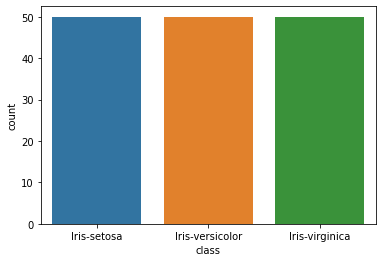

In [ ]:
ax = sns.countplot(x='class', data=df)

#**Pré-processamento**

**Transformando o atributo target, "class", que está em formato categórico para formato numérico**


*   Isso é realizado para que o modelo consiga calcular
*   iris-setosa foi classificada como 1
*   iris-versicolor foi classificada como 2
*   iris-virginica foi classificada como 3




In [ ]:
df['class'] = df['class'].str.lower().replace('iris-setosa','1')
df['class'] = df['class'].str.lower().replace('iris-versicolor','2')
df['class'] = df['class'].str.lower().replace('iris-virginica','3')


**Resultado**

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
df['class'].value_counts().sort_values(ascending=False)

3    50
1    50
2    50
Name: class, dtype: int64

<p align="justify">
Após analisar o dataset, não foi visto necessário realizar nenhum outro
tratamento além da formatação do atributo target,
estando os dados preparados para serem recebidos pelo modelo.
</p>

#**Modelo ML**

<p align="justify">
O algoritmo Extra Trees funciona criando um grande número de árvores de decisão não ajustadas a partir do conjunto de dados de treinamento. As previsões são feitas calculando a média da previsão das árvores de decisão no caso de regressão ou usando a votação por maioria no caso de classificação.

---



*   Regressão : previsões feitas calculando a média das previsões das árvores de decisão.

*   Classificação : Previsões feitas por votação majoritária de árvores de decisão.


</p>



*   Diferente dos algoritmos bagging e random forest, o algoritmo Extra Trees ajusta cada árvore de decisão em todo o conjunto de dados de treinamento.

*   Como a floresta aleatória, o algoritmo Extra Trees irá amostrar aleatoriamente os recursos em cada ponto de divisão de uma árvore de decisão.

<p align="justify">
"O algoritmo Extra-Trees constrói um conjunto de árvores de decisão ou regressão não ajustadas de acordo com o procedimento clássico de cima para baixo. Suas duas principais diferenças com outros métodos de conjunto baseados em árvore são que ele divide os nós escolhendo pontos de corte totalmente ao acaso e que usa todo o exemplo de aprendizagem (em vez de uma réplica bootstrap) para fazer as árvores crescer."

— Extremely Randomized Trees, 2006.

</p>

*O modelo trabalhará com o método de **aprendizagem supervisionada**, onde a variável **target é "Class"**, que especifica o tipo de flor correspondente as características estabelecidas como variáveis preditoras. São estas: largura e comprimento da sépala e da pétala.*

**Separando as variáveis entre preditoras e variável alvo**

A varável **y** recebe a variável alvo e **x** recebe as variáveis preditoras.

In [ ]:
y = df['class']
x = df.drop('class', axis = 1)

In [ ]:
#class
y.shape

(150,)

In [ ]:
#sepal_length, sepal_width,	petal_length,	petal_width	
x.shape

(150, 4)

**Criando os conjuntos de dados de treino e teste**

A função train_test_split é utilizada para calcular e fazer divisão aleatória em conjuntos de treinamento e teste de forma rápida e eficaz.



*   70% dos dados são separados para Treino
*   30% dos dados são separados para Teste
*   random_state é setado para 1, embaralhando os dados 1 vez antes de aplicar a divisão dos dados
*   stratify é setado para y, dividindo os dados de forma estratificada usando isso como rótulos de classe.



In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, random_state = 1, stratify =y, test_size = 0.3)

In [ ]:
#dados de treino - 70%
x_treino.shape

(105, 4)

In [ ]:
#dados de teste - 30%
x_teste.shape

(45, 4)

**Instanciando objeto classificador**

In [ ]:
modelo = ExtraTreesClassifier()

**Treinando modelo**

In [ ]:
modelo.fit(x_treino, y_treino)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

**Verificando as features mais relevantes para o modelo treinado**


In [ ]:
modelo.feature_importances_

array([0.10702059, 0.07004378, 0.38248177, 0.44045386])

In [ ]:
for feature, importancia in zip(df.columns, modelo.feature_importances_):
   print('{}:{}'.format(feature, importancia))

sepal_length:0.10702058863285369
sepal_width:0.07004377945920529
petal_length:0.38248177302519554
petal_width:0.4404538588827455


**Features:** petal_width e petal_length

<p align="justify">

Dentre os atributos utlizados como variavéis preditoras, a largura e o comprimento da pétala demonstram ser as features que possuem maior representatividade e relevância para o modelo, determinando o rótulo de saída de acordo com a Floresta Árvores Extras construída.

</p>

**Fazendo predição do conjunto de dados de teste**

<p align="justify">

Após treino e apredizagem, é realizado o teste do modelo com o conjunto de dados separado para teste, possibilitando análise de seu aprendizado e seus resultados.
</p>

In [ ]:
y_pred = modelo.predict(x_teste)

*Este método retorna as predições dos dados de teste.*

#**Avaliação**

**Relatório de Classificação**

*    A avaliação do resultado do modelo é feita através das métricas accuracy, recall e F1.
*   Como os dados não estão desbalanceados a acurácia pode ser usada para avaliar a assertividade do modelo.

In [ ]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.94      1.00      0.97        15
           3       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
print('Score da métrica Accuracy {:.1f}%'.format(100 * accuracy_score(y_teste, y_pred)))
print('Score da métrica recall {:.1f}%'.format(100 * recall_score(y_teste, y_pred, average = 'micro')))
print('Score da métrica F1 {:.1f}%'.format(100 * f1_score(y_teste, y_pred, average = 'micro')))

Score da métrica Accuracy 97.8%
Score da métrica recall 97.8%
Score da métrica F1 97.8%


<p align="justify">

*   O modelo mostrou alta acurácia com 97.8% de assertividade e precisão na classificação dos dados, e também uma média de 97.8%  nas demais métricas de avaliação Recall e F1, indicando que o modelo está classificando muito bem.
*   Observe-se que o Recall mostrou um resultado mais verídico no relato do real comportamento do modelo, como pode ser observado com mais detalhe através da matriz de confusão, apresentando 100% de assertividade ao classificar as classes 1 e 2 e 93% ao classificar a classe 3.



**Observação:** *Após setados os atributos random_state = 1 e stratify =y na função train_test_split, que servem respectivamente para controlar o embaralhamento aplicado aos dados antes de aplicar a divisão, e dividir os dados de forma estratificada usando isso como rótulos de classe, a acurácia aumentou significativamente de 93% para 97.8% melhorando a precisão do modelo.*
</p>




**Matriz de Confusão**

In [ ]:
print(pd.crosstab(y_teste, y_pred, rownames=['Real'], colnames=['Predito'], margins=True ))

Predito   1   2   3  All
Real                    
1        15   0   0   15
2         0  15   0   15
3         0   1  14   15
All      15  16  14   45


[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


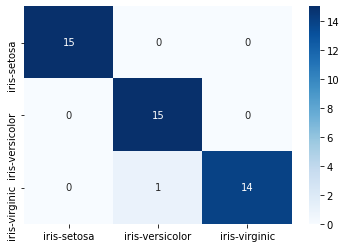

In [ ]:
mc = cm(y_teste,y_pred )
print(mc)
labels = ['iris-setosa', 'iris-versicolor', 'iris-virginic']
labels = np.array(labels)
sns.heatmap(mc,annot=True, yticklabels=labels,
            xticklabels= labels,cmap = 'Blues')

Através da matriz de confusão é possível analisar o comportamento do modelo e seus resultados com mais detalhe:


*   Na classe 1, Iris Setosa, o modelo teve 100% de acerto na classificação, não gerando nenhum falso positivo ou falso negativo, classificando as 15 amostras de Iris Setosa corretamente.

*   Na classe 2, Iris Versicolor, o modelo teve 100% de acerto na classificação, não gerando nenhum falso positivo ou falso negativo, classificando as 15 amostras de Iris Versicolor corretamente.

*   Na classe 3, Iris Virginic, o modelo errou gerando um falso negativo ao classificar a Iris Virginic como Iris Versocolor. Porém teve 93% de acerto, como mostra a métrica Recall no relatório de classificação,permanecendo com alta assertividade, classificando 14 amostras corretamente.






#**Conclusão**


<p align="justify">
Tendo em vista a análise dos resultados e análises feitas em todas as etapas do processo de construção do modelo, é possível concluir que o modelo Extra Trees Classifier se mostrou um ótimo modelo para classificação, inclusive neste  cenário, apresentando alta acurácia com o valor de 97.8%, indicando ótima precisão na predição de espécies de iris. 

Este resultado foi possível após ajustes feitos nos parâmetros da função train_test_split, onde determinou-se o número de aleatoriedade dos dados antes da divisão entre os de teste e de treino, e a divisão destes de forma estratificada. Observou-se que ao deixar os parâmetros com os valores padrões o modelo teve uma acurácia de 93%, e ao aumentar o valor do random_state com valores a partir de 5, a acurácia começou a diminuir apresentando valores de 91% a 88%.

Para melhores resultados são sugeridos ajustes nos parâmetros do algoritmo Extra Trees Classifier e na função train_test_split. E também pode-se optar por realização de testes com outros algoritmos que apresentam ótimos resultados em classificações como Random Forest ou Bagging, os quais são similares ao Extra Trees Classifier, mas tem suas árvores construídas de forma diferente desenvolvendo cada árvore de decisão a partir de uma amostra de bootstrap, enquanto o algoritmo Extra Trees Classifier ajusta cada árvore de decisão em todo o conjunto de dados de treinamento, realizando previsões por votação majoritária de árvores de decisão.  </p>